In [3]:
#importing necessary files
import pandas as pd 

import numpy as np
import json 

!conda install -c anaconda seaborn -y
import seaborn as sns


import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker



!conda install -c conda-forge folium=0.5.0 --yes 
import folium 

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  47.83 MB/s
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.19.0                     py_0    conda-forge
Libraries imported.


## Fetchng data (csv file) from URL using PANDA and save it to dataframe.

In [4]:

Newyork_df = pd.read_csv('https://query.data.world/s/c2nm5gs6r2exf2qt2hpneqxax7oxhe')



Newyork_df

,FacilityName,Service Category,Service Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
2,1 Centre Street,Farmers Markets and Food Boxes,Food Boxes,1 Centre Street,"South Building, 9th Floor",Manhattan,11101,40.713028,-74.003753,Open year-round,NaN,NaN,NaN,NaN,NaN,2:00 pm - 6:00 pm,NaN,NaN,NaN,True,False,True,https://www.grownyc.org/greenmarketco/foodbox,"(40.7130276, -74.0037529)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"
5,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,Market open dates: 6/29/2017 to 11/30/2017,06/29/2017,11/30/2017,NaN,NaN,NaN,8am-5pm,NaN,NaN,NaN,True,True,False,https://www.grownyc.org/greenmarket,"(40.8459557405, -73.9378126725)"
6,57th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,57th St & 9th Ave,NaN,Manhattan,10019,40.767925,-73.985716,Market open dates: 5/17/2017 to 12/23/2017,05/17/2017,12/23/2017,NaN,NaN,8am-5pm,NaN,NaN,8am-5pm,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.7679253828, -73.9857161617999)"
7,79th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Columbus Ave bet 78th & 81st Sts,NaN,Manhattan,10024,40.783250,-73.974541,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-5pm,True,False,True,https://www.grownyc.org/greenmarket,"(40.7832500724, -73.9745405583999)"
8,92nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,92nd St & 1st Ave,NaN,Manhattan,10128,40.781324,-73.946131,Market open dates: 6/25/2017 to 11/19/2017,06/25/2017,11/19/2017,NaN,NaN,NaN,NaN,NaN,NaN,9am-4pm,True,False,False,https://www.grownyc.org/greenmarket,"(40.7813244698999, -73.9461310652)"
9,97th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,97th St bet Columbus & Amsterdam Aves,NaN,Manhattan,10025,40.794744,-73.969874,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,8am-2pm,NaN,NaN,True,True,True,https://www.grownyc.org/greenmarket,"(40.7947438866, -73.9698736061999)"


In [6]:
#renaming column and find unique services
Newyork_df.rename(columns={'Service Type':'Service_Type'}, inplace=True)
print(Newyork_df.Service_Type.unique())

['Farmers Markets' 'Food Boxes']


In [7]:
Newyork_df['Service_Type'].value_counts().to_frame()

,Service_Type
Farmers Markets,144
Food Boxes,17


## Dataset preperation

In [8]:

Newyork_df_new = Newyork_df[Newyork_df['Service_Type'] == 'Farmers Markets'].copy()
Newyork_df_new ['Borough'] = Newyork_df_new['Borough'].map(lambda x: x.strip())
print(Newyork_df_new.shape)
Newyork_df_new.head()

(144, 24)


,FacilityName,Service Category,Service_Type,Address,Address 2,Borough,ZipCode,Latitude,Longitude,AdditionalInfo,StartDate,EndDate,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Accepts EBT,NYC Dept of Health Cooking Demonstrations,Open Year-Round,Website,Location Point
0,Inwood Park Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,Isham St bet Seaman & Cooper,NaN,Manhattan,10034,40.869009,-73.920320,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8am-3pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.8690087167, -73.9203204394)"
1,82nd Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,82nd St bet 1st & York Aves,NaN,Manhattan,10028,40.773448,-73.948954,Open year-round,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9am-2:30pm,NaN,True,False,True,https://www.grownyc.org/greenmarket,"(40.7734483572999, -73.9489535725)"
3,125th Street Farmers Market,Farmers Markets and Food Boxes,Farmers Markets,125th St & Adam Clayton Powell Jr Blvd,NaN,Manhattan,10027,40.808981,-73.948327,Market open dates: 6/13/2017 to 11/21/2017,06/13/2017,11/21/2017,NaN,10am-7pm,NaN,NaN,NaN,NaN,NaN,True,False,False,https://www.grownyc.org/greenmarket,"(40.8089813746999, -73.9483266703999)"
4,170 Farm Stand,Farmers Markets and Food Boxes,Farmers Markets,170th St & Townsend Ave,NaN,Bronx,10452,40.840095,-73.916827,Market open dates: 7/5/2017 to 11/22/2017,07/05/2017,11/22/2017,NaN,NaN,2:30pm-6:30pm,NaN,NaN,NaN,NaN,True,False,False,NaN,"(40.840095, -73.916827)"
5,175th Street Greenmarket,Farmers Markets and Food Boxes,Farmers Markets,175th St bet Wadsworth Ave & Broadway,NaN,Manhattan,10033,40.845956,-73.937813,Market open dates: 6/29/2017 to 11/30/2017,06/29/2017,11/30/2017,NaN,NaN,NaN,8am-5pm,NaN,NaN,NaN,True,True,False,https://www.grownyc.org/greenmarket,"(40.8459557405, -73.9378126725)"


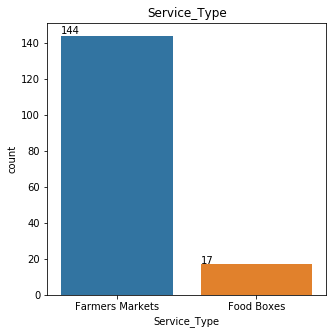

In [17]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=Newyork_df)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

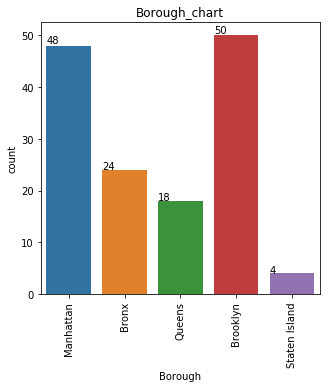

In [16]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=Newyork_df_new)
ax.set_title("Borough_chart")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])


plt.xticks(rotation=90) 
plt.show()

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The coordinate of New York are {}, {}.'.format(latitude, longitude))

The coordinate of New York are 40.7127281, -74.0060152.


In [15]:
# create map of New York City using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, FacilityName, borough in zip(Newyork_df_new['Latitude'], Newyork_df_new['Longitude'], Newyork_df_new['FacilityName'], Newyork_df_new['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=7,
                popup=label,
                color='red',
                fill=True,
                fill_color='blue',
                fill_opacity=0.5,
                parse_html = False).add_to(map_newyork)  

map_newyork